In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
provider_charge_inpatient = pd.read_csv("E:\Analytix labs\Internship\Project 10 - Final Project\Data\Medicare_Provider_Charge_Inpatient_DRG100_FY2011.csv")

In [3]:
provider_charge_inpatient.head(5)

,DRG Definition,DRG,Provider Id,Provider Name,Provider Street Address,Provider City,Provider State,Provider Zip Code,Hospital Referral Region (HRR) Description,Hospital Referral Region,Total Discharges,Average Covered Charges,Average Total Payments,Average Medicare Payments
0,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,EXTRACRANIAL PROCEDURES W/O CC/MC,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,AL - Dothan,Dothan,91,32963.07692,5777.241758,4763.736264
1,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,EXTRACRANIAL PROCEDURES W/O CC/MC,10005,MARSHALL MEDICAL CENTER SOUTH,2505 U S HIGHWAY 431 NORTH,BOAZ,AL,35957,AL - Birmingham,Birmingham,14,15131.85714,5787.571429,4976.714286
2,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,EXTRACRANIAL PROCEDURES W/O CC/MC,10006,ELIZA COFFEE MEMORIAL HOSPITAL,205 MARENGO STREET,FLORENCE,AL,35631,AL - Birmingham,Birmingham,24,37560.37500,5434.958333,4453.791667
3,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,EXTRACRANIAL PROCEDURES W/O CC/MC,10011,ST VINCENT'S EAST,50 MEDICAL PARK EAST DRIVE,BIRMINGHAM,AL,35235,AL - Birmingham,Birmingham,25,13998.28000,5417.560000,4129.160000
4,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,EXTRACRANIAL PROCEDURES W/O CC/MC,10016,SHELBY BAPTIST MEDICAL CENTER,1000 FIRST STREET NORTH,ALABASTER,AL,35007,AL - Birmingham,Birmingham,18,31633.27778,5658.333333,4851.444444


In [4]:
# Renaming the columns
provider_charge_inpatient.columns = [col.replace(" ", "_") for col in provider_charge_inpatient.columns]

In [5]:
provider_charge_inpatient.head(5)

,DRG_Definition,DRG,Provider_Id,Provider_Name,Provider_Street_Address,Provider_City,Provider_State,Provider_Zip_Code,Hospital_Referral_Region_(HRR)_Description,Hospital_Referral_Region,Total_Discharges,Average_Covered_Charges,Average_Total_Payments,Average_Medicare_Payments
0,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,EXTRACRANIAL PROCEDURES W/O CC/MC,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,AL - Dothan,Dothan,91,32963.07692,5777.241758,4763.736264
1,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,EXTRACRANIAL PROCEDURES W/O CC/MC,10005,MARSHALL MEDICAL CENTER SOUTH,2505 U S HIGHWAY 431 NORTH,BOAZ,AL,35957,AL - Birmingham,Birmingham,14,15131.85714,5787.571429,4976.714286
2,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,EXTRACRANIAL PROCEDURES W/O CC/MC,10006,ELIZA COFFEE MEMORIAL HOSPITAL,205 MARENGO STREET,FLORENCE,AL,35631,AL - Birmingham,Birmingham,24,37560.37500,5434.958333,4453.791667
3,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,EXTRACRANIAL PROCEDURES W/O CC/MC,10011,ST VINCENT'S EAST,50 MEDICAL PARK EAST DRIVE,BIRMINGHAM,AL,35235,AL - Birmingham,Birmingham,25,13998.28000,5417.560000,4129.160000
4,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,EXTRACRANIAL PROCEDURES W/O CC/MC,10016,SHELBY BAPTIST MEDICAL CENTER,1000 FIRST STREET NORTH,ALABASTER,AL,35007,AL - Birmingham,Birmingham,18,31633.27778,5658.333333,4851.444444


In [6]:
provider_charge_inpatient.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 163065 entries, 0 to 163064
Data columns (total 14 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   DRG_Definition                              163065 non-null  object 
 1   DRG                                         163065 non-null  object 
 2   Provider_Id                                 163065 non-null  int64  
 3   Provider_Name                               163065 non-null  object 
 4   Provider_Street_Address                     163065 non-null  object 
 5   Provider_City                               163065 non-null  object 
 6   Provider_State                              163065 non-null  object 
 7   Provider_Zip_Code                           163065 non-null  int64  
 8   Hospital_Referral_Region_(HRR)_Description  163065 non-null  object 
 9   Hospital_Referral_Region                    163065 non-null  object 
 

In [7]:
provider_charge_inpatient['DRG_Definition'] = provider_charge_inpatient['DRG_Definition'].str.extract(r"(\d+)")
# Convert DRG Code to integer and replace values < 100 with 39
provider_charge_inpatient['DRG_Definition'] = provider_charge_inpatient['DRG_Definition'].astype(int).apply(lambda x: 39 if x < 100 else x)

In [8]:
provider_charge_inpatient.head(5)

,DRG_Definition,DRG,Provider_Id,Provider_Name,Provider_Street_Address,Provider_City,Provider_State,Provider_Zip_Code,Hospital_Referral_Region_(HRR)_Description,Hospital_Referral_Region,Total_Discharges,Average_Covered_Charges,Average_Total_Payments,Average_Medicare_Payments
0,39,EXTRACRANIAL PROCEDURES W/O CC/MC,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,AL - Dothan,Dothan,91,32963.07692,5777.241758,4763.736264
1,39,EXTRACRANIAL PROCEDURES W/O CC/MC,10005,MARSHALL MEDICAL CENTER SOUTH,2505 U S HIGHWAY 431 NORTH,BOAZ,AL,35957,AL - Birmingham,Birmingham,14,15131.85714,5787.571429,4976.714286
2,39,EXTRACRANIAL PROCEDURES W/O CC/MC,10006,ELIZA COFFEE MEMORIAL HOSPITAL,205 MARENGO STREET,FLORENCE,AL,35631,AL - Birmingham,Birmingham,24,37560.37500,5434.958333,4453.791667
3,39,EXTRACRANIAL PROCEDURES W/O CC/MC,10011,ST VINCENT'S EAST,50 MEDICAL PARK EAST DRIVE,BIRMINGHAM,AL,35235,AL - Birmingham,Birmingham,25,13998.28000,5417.560000,4129.160000
4,39,EXTRACRANIAL PROCEDURES W/O CC/MC,10016,SHELBY BAPTIST MEDICAL CENTER,1000 FIRST STREET NORTH,ALABASTER,AL,35007,AL - Birmingham,Birmingham,18,31633.27778,5658.333333,4851.444444


In [9]:
# Null Checking
provider_charge_inpatient.isnull().sum()

DRG_Definition                                0
DRG                                           0
Provider_Id                                   0
Provider_Name                                 0
Provider_Street_Address                       0
Provider_City                                 0
Provider_State                                0
Provider_Zip_Code                             0
Hospital_Referral_Region_(HRR)_Description    0
Hospital_Referral_Region                      0
Total_Discharges                              0
Average_Covered_Charges                       0
Average_Total_Payments                        0
Average_Medicare_Payments                     0
dtype: int64

In [10]:
# Duplicate Checking
provider_charge_inpatient.duplicated().sum()

0

In [11]:
# Outliers checking

def plot_(x):
    x.plot(kind = 'box')
    plt.show()

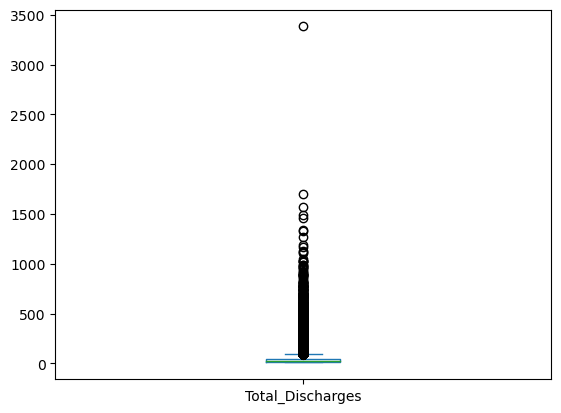

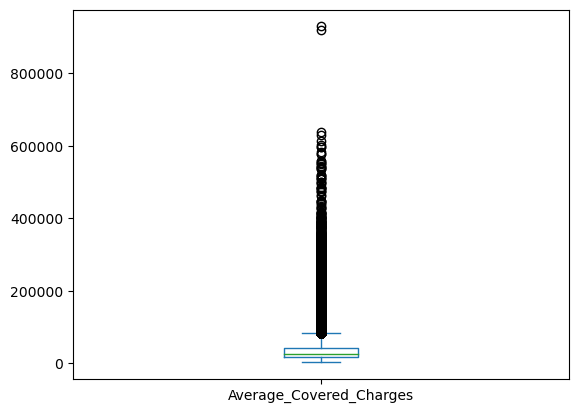

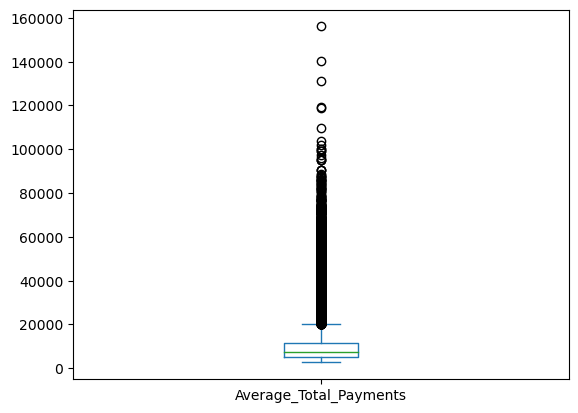

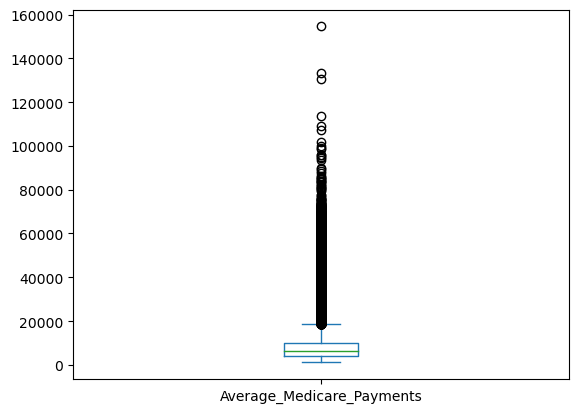

Total_Discharges             None
Average_Covered_Charges      None
Average_Total_Payments       None
Average_Medicare_Payments    None
dtype: object

In [12]:
provider_charge_inpatient.loc[:,['Total_Discharges','Average_Covered_Charges','Average_Total_Payments','Average_Medicare_Payments']].apply(plot_)

In [13]:
def outlier_treat(df):
    col = ['Total_Discharges','Average_Covered_Charges','Average_Total_Payments','Average_Medicare_Payments']
    for i in col:
        q1 = df[i].quantile(0.25)
        q3 = df[i].quantile(0.75)
        iqr = q3-q1
        lc = q1-1.5*iqr
        uc = q3+1.5*iqr

        df[i]=np.where(df[i]<lc,lc,df[i])
        df[i]=np.where(df[i]>uc,uc,df[i])

    return df

In [14]:
provider_charge_inpatient = outlier_treat(provider_charge_inpatient)

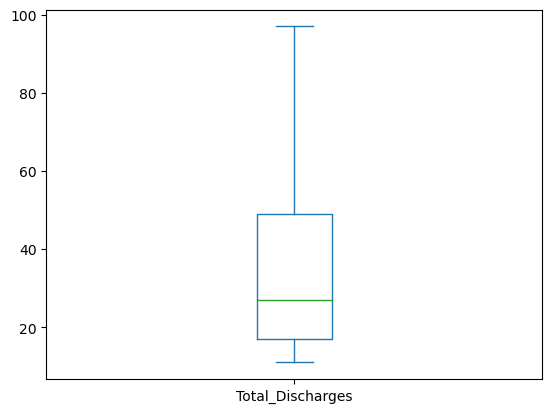

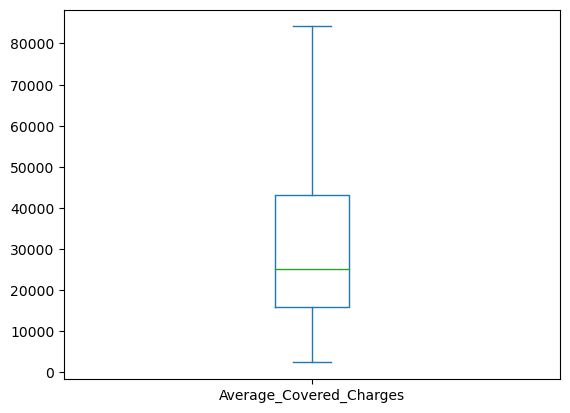

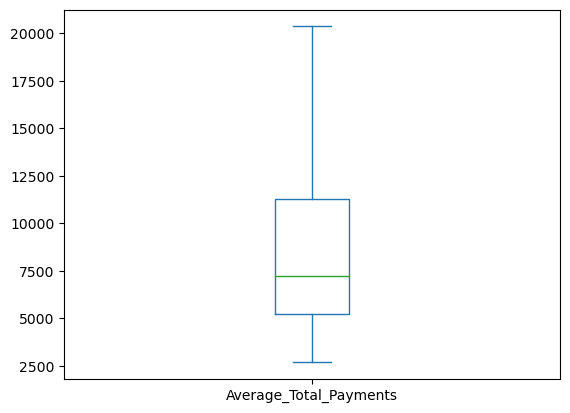

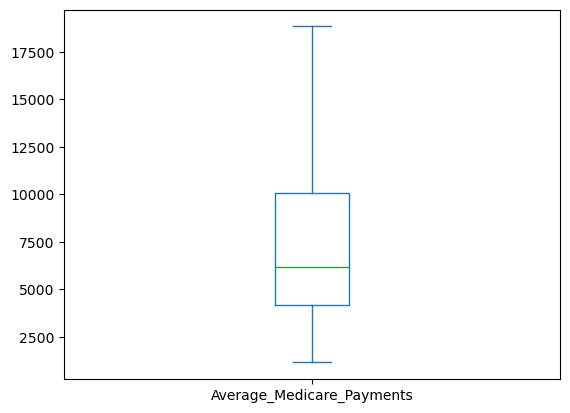

Total_Discharges             None
Average_Covered_Charges      None
Average_Total_Payments       None
Average_Medicare_Payments    None
dtype: object

In [15]:
provider_charge_inpatient.loc[:,['Total_Discharges','Average_Covered_Charges','Average_Total_Payments','Average_Medicare_Payments']].apply(plot_)

In [16]:
provider_charge_inpatient.head(5)

,DRG_Definition,DRG,Provider_Id,Provider_Name,Provider_Street_Address,Provider_City,Provider_State,Provider_Zip_Code,Hospital_Referral_Region_(HRR)_Description,Hospital_Referral_Region,Total_Discharges,Average_Covered_Charges,Average_Total_Payments,Average_Medicare_Payments
0,39,EXTRACRANIAL PROCEDURES W/O CC/MC,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,AL - Dothan,Dothan,91.0,32963.07692,5777.241758,4763.736264
1,39,EXTRACRANIAL PROCEDURES W/O CC/MC,10005,MARSHALL MEDICAL CENTER SOUTH,2505 U S HIGHWAY 431 NORTH,BOAZ,AL,35957,AL - Birmingham,Birmingham,14.0,15131.85714,5787.571429,4976.714286
2,39,EXTRACRANIAL PROCEDURES W/O CC/MC,10006,ELIZA COFFEE MEMORIAL HOSPITAL,205 MARENGO STREET,FLORENCE,AL,35631,AL - Birmingham,Birmingham,24.0,37560.37500,5434.958333,4453.791667
3,39,EXTRACRANIAL PROCEDURES W/O CC/MC,10011,ST VINCENT'S EAST,50 MEDICAL PARK EAST DRIVE,BIRMINGHAM,AL,35235,AL - Birmingham,Birmingham,25.0,13998.28000,5417.560000,4129.160000
4,39,EXTRACRANIAL PROCEDURES W/O CC/MC,10016,SHELBY BAPTIST MEDICAL CENTER,1000 FIRST STREET NORTH,ALABASTER,AL,35007,AL - Birmingham,Birmingham,18.0,31633.27778,5658.333333,4851.444444


In [17]:
provider_charge_inpatient.drop(columns = ['DRG', 'Provider_Name', 'Provider_Street_Address', 'Provider_City', 'Provider_State', 'Provider_Zip_Code', 'Hospital_Referral_Region_(HRR)_Description' , 'Hospital_Referral_Region'],inplace = True)

In [18]:
provider_charge_inpatient.head(5)

,DRG_Definition,Provider_Id,Total_Discharges,Average_Covered_Charges,Average_Total_Payments,Average_Medicare_Payments
0,39,10001,91.0,32963.07692,5777.241758,4763.736264
1,39,10005,14.0,15131.85714,5787.571429,4976.714286
2,39,10006,24.0,37560.37500,5434.958333,4453.791667
3,39,10011,25.0,13998.28000,5417.560000,4129.160000
4,39,10016,18.0,31633.27778,5658.333333,4851.444444


In [19]:
from sklearn.ensemble import IsolationForest

In [20]:
# Train Isolation Forest
ifm1 = IsolationForest(contamination=0.05, random_state=42)  # 5% anomalies

In [21]:
ifm1.fit(provider_charge_inpatient)


IsolationForest(contamination=0.05, random_state=42)

In [22]:
# Save the model
#import pickle

#with open("ifm1.pkl", "wb") as file:
#    pickle.dump(ifm1, file)

#print("✅ Model trained and saved as `ifm1.pkl`")

✅ Model trained and saved as `ifm1.pkl`
